# Exploratory analysis

A brief exploratory analysis example. 

## Library and color scale

In [57]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
loadlibrary("MASS")
loadlibrary("gclus")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")
loadlibrary("GGally")
loadlibrary("reshape")
loadlibrary("dplyr")
loadlibrary("WVPlots")
loadlibrary("aplpack")

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]
options(repr.plot.width=4, repr.plot.height=3)

Loading required package: aplpack
Warning message:
"package 'aplpack' was built under R version 3.5.2"Loading required package: tcltk


## Loading iris and wine datasets
The exploratory analysis is done using iris dataset.


In [75]:
data(iris)
t(sapply(iris, class))
head(iris,5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
numeric,numeric,numeric,numeric,factor


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


### Data Summary
A preliminary analysis using $Sepal.Length$ attribute. 

In [76]:
summary(iris$Sepal.Length)
table(iris$Sepal.Length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 


4.3 4.4 4.5 4.6 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9   6 6.1 6.2 
  1   3   1   4   2   5   6  10   9   4   1   6   7   6   8   7   3   6   6   4 
6.3 6.4 6.5 6.6 6.7 6.8 6.9   7 7.1 7.2 7.3 7.4 7.6 7.7 7.9 
  9   7   5   2   8   3   4   1   1   3   1   1   1   4   1 

## Histogram analysis

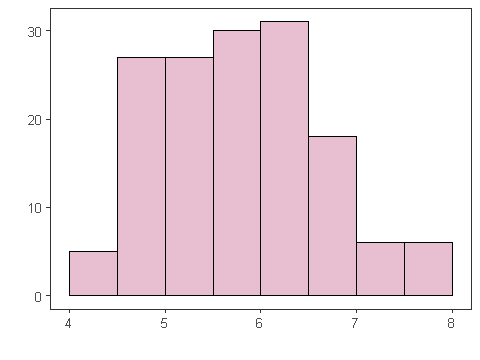

In [77]:
grfA <- plot.hist(iris %>% select(variable="Sepal.Length", value=Sepal.Length), color=mycolors[1])
plot(grfA)

## Density distribution
The attribute Sepal.Length is observed.
Grouping this attribute according to Species provides a better understanding of the data.

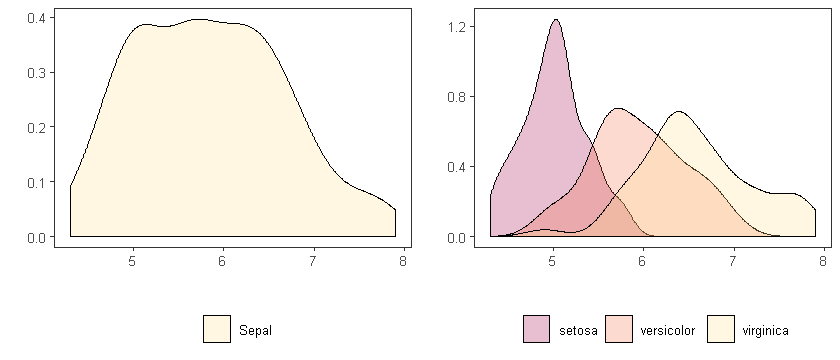

In [78]:
series <- data.frame(variable="Sepal", value=iris$Sepal.Length)
grfA <- plot.density(series, colors=mycolors[3])

series <- data.frame(variable=iris$Species, value=iris$Sepal.Length)
grfB <- plot.density(series, colors=mycolors[c(1:3)])

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(grfA, grfB, ncol=2)
options(repr.plot.width=4, repr.plot.height=3)

## Box-plot analysis

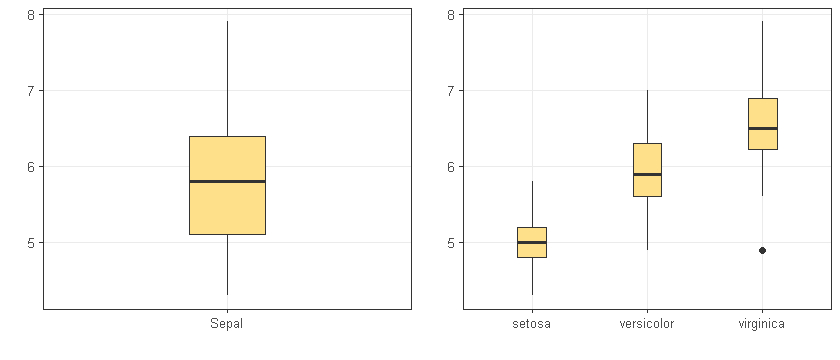

In [79]:
series <- data.frame(variable="Sepal", value=iris$Sepal.Length)
grfA <- plot.boxplot(series, colors=mycolors[3])

series <- data.frame(variable=iris$Species, value=iris$Sepal.Length)
grfB <- plot.boxplot(series, colors=mycolors[3])

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(grfA, grfB, ncol=2)
options(repr.plot.width=4, repr.plot.height=3)

## Checking for normal distribution

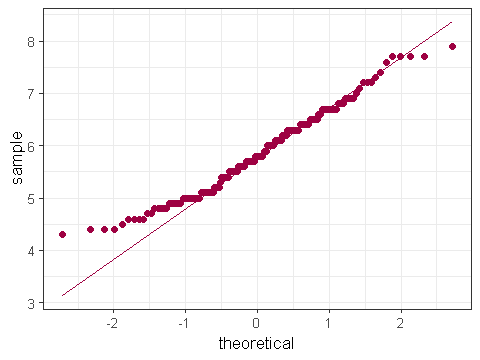

In [80]:
ggplot(iris, aes(sample = Sepal.Length)) +
  stat_qq(color=mycolors[1]) + theme_bw(base_size = 10) +
  stat_qq_line(color=mycolors[1])

## Correlation matrix

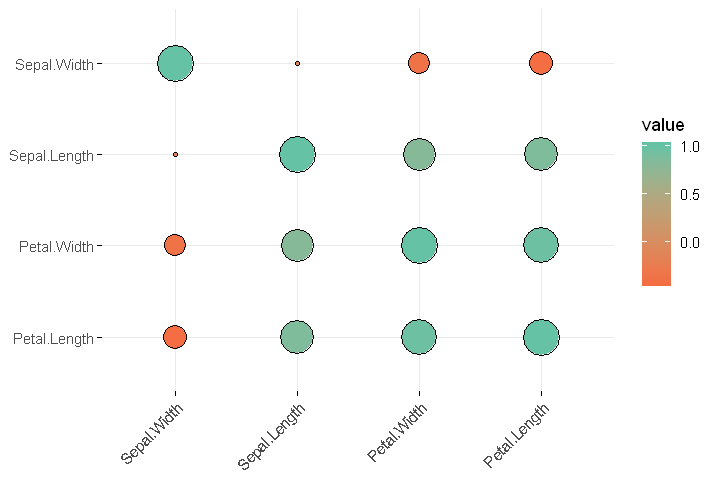

In [98]:
cor_mat <- cor(iris[1:4])
cor_mat <- melt(cor_mat)
colnames(cor_mat) <- c("x", "variable", "value")
cor_mat$variable <- factor(cor_mat$variable, levels=sort(colnames(iris[1:4])))
cor_mat$x <- factor(cor_mat$x, levels=sort(colnames(iris[1:4]),decreasing=TRUE))
cor_mat$radius <- abs(cor_mat$value)

options(repr.plot.width=6, repr.plot.height=4)

grf <- plot_ballon(cor_mat, color = col.set[c(3,9)]) 
plot(grf)

options(repr.plot.width=4, repr.plot.height=3)

## Parallel coordinates

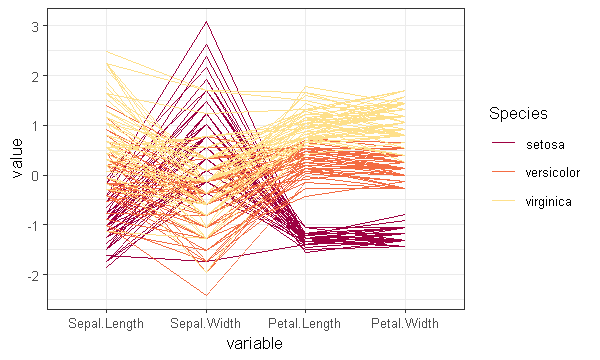

In [84]:
options(repr.plot.width=5, repr.plot.height=3)

p <- ggparcoord(data = iris, columns = c(1:4), group=5) + theme_bw(base_size = 10) + scale_color_manual(values=mycolors[1:3])
plot(p)

options(repr.plot.width=4, repr.plot.height=3)

## Matrix dispersion

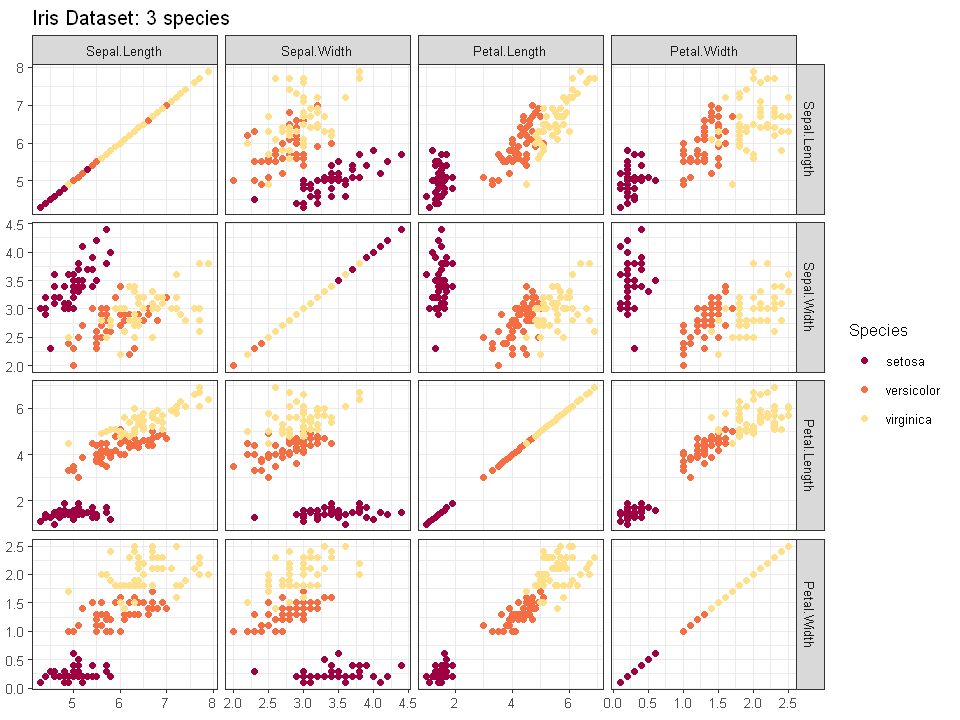

In [85]:
options(repr.plot.width=8, repr.plot.height=6)

grf <- PairPlot(iris, 
                colnames(iris)[1:4], 
                "Iris Dataset: 3 species", 
                group_var = "Species", palette=NULL) + theme_bw(base_size = 10) + scale_color_manual(values=mycolors[1:3])
plot(grf)

options(repr.plot.width=4, repr.plot.height=3)

## Advanced matrix dispersion

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


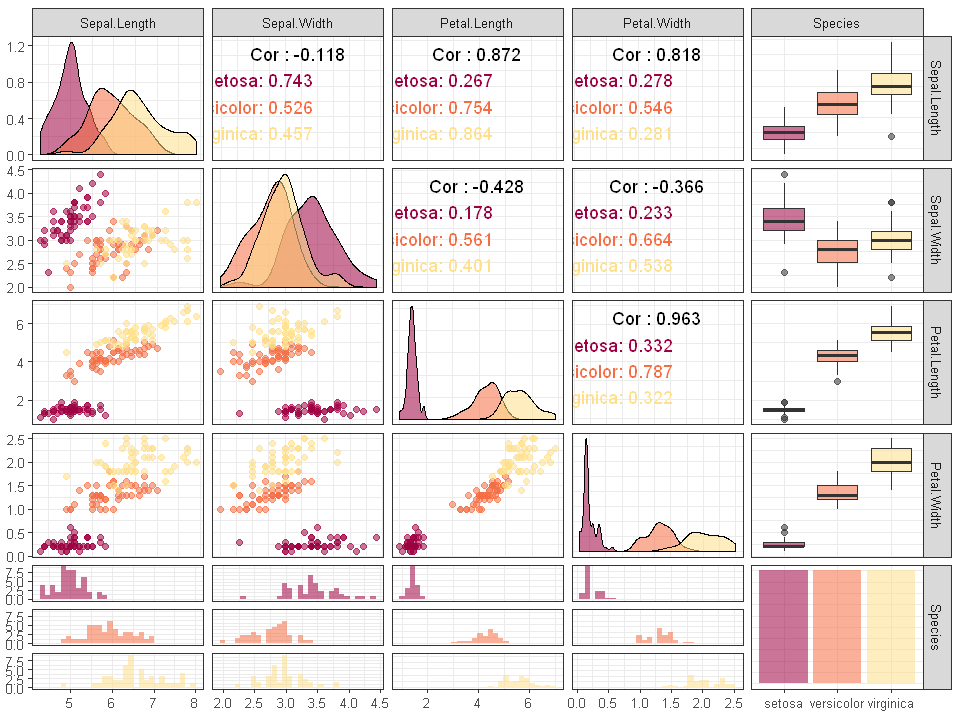

In [86]:
options(repr.plot.width=8, repr.plot.height=6)
grf <- ggpairs(iris[,], aes(colour = Species, alpha = 0.4)) + theme_bw(base_size = 10) 

for(i in 1:grf$nrow) {
  for(j in 1:grf$ncol){
    grf[i,j] <- grf[i,j] + 
      scale_fill_manual(values=mycolors[1:3]) +
      scale_color_manual(values=mycolors[1:3])  
  }
}

grf

options(repr.plot.width=4, repr.plot.height=3)

## Chernoff Faces

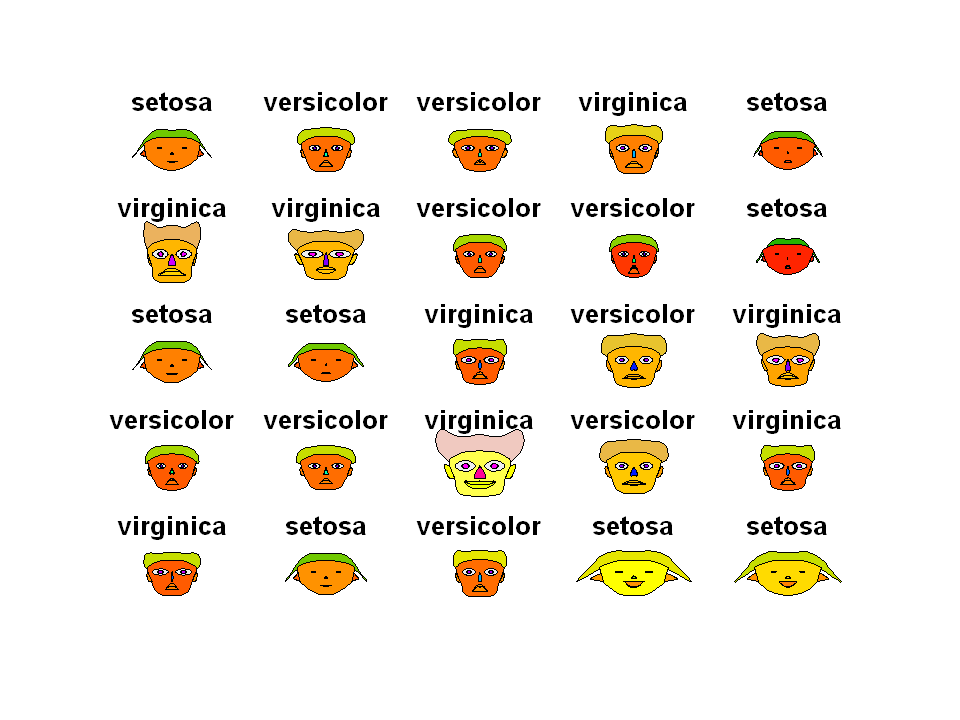

In [87]:
set.seed(1)
sample_rows = sample(1:nrow(iris), 25)

isample = iris[sample_rows,]
labels = as.character(isample$Species)
isample$Species <- NULL

options(repr.plot.width=8, repr.plot.height=6)
faces(isample, labels = labels, print.info=F)
options(repr.plot.width=4, repr.plot.height=3)